PIMA INDIANS DIABETES DATASET


Define Problem

    Mô tả

Pima Indians Diabetes thường được dùng trong học máy để xây dựng mô hình dự đoán bệnh tiểu đường type 2.

    Mục tiêu: dựa trên một số đặc trưng y tế và nhân khẩu học của phụ nữ người da đỏ Pima (trên 21 tuổi), dự đoán xem họ có mắc tiểu đường hay không.

    Dữ liệu đầu vào
- Pregnancies – Số lần mang thai

- Glucose – Nồng độ đường huyết (mg/dL) sau 2 giờ test dung nạp glucose

- BloodPressure – Huyết áp tâm trương (mm Hg)

- SkinThickness – Độ dày nếp gấp da (mm)

- Insulin – Nồng độ insulin huyết thanh (μU/ml)

- BMI – Chỉ số khối cơ thể (kg/m²)

- DiabetesPedigreeFunction – Chỉ số di truyền liên quan đến tiểu đường

- Age – Tuổi (năm)

    Dữ liệu đầu ra
    - 0: Không tiểu đường
    - 1: Tiểu đường

2. Khai báo thư viện

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

3. Load Dataset

In [32]:
import pandas as pd

col_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv("pima-indians-diabetes.csv", names=col_names, header=None)

print("Kích thước dataset:", df.shape)
print(f'+ Kiểu dữ liệu: \n{df.dtypes}')
print(df.head(5))
df.info()


Kích thước dataset: (768, 9)
+ Kiểu dữ liệu: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3      

Kiểm tra tính toàn vẹn

In [35]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()

print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])

print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    display.display(df[df.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 0


Các tính chất thống kê

In [37]:
description = df.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Sự tương quan giữa các giá trị

In [39]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Vẽ histogram để xem độ phân phối

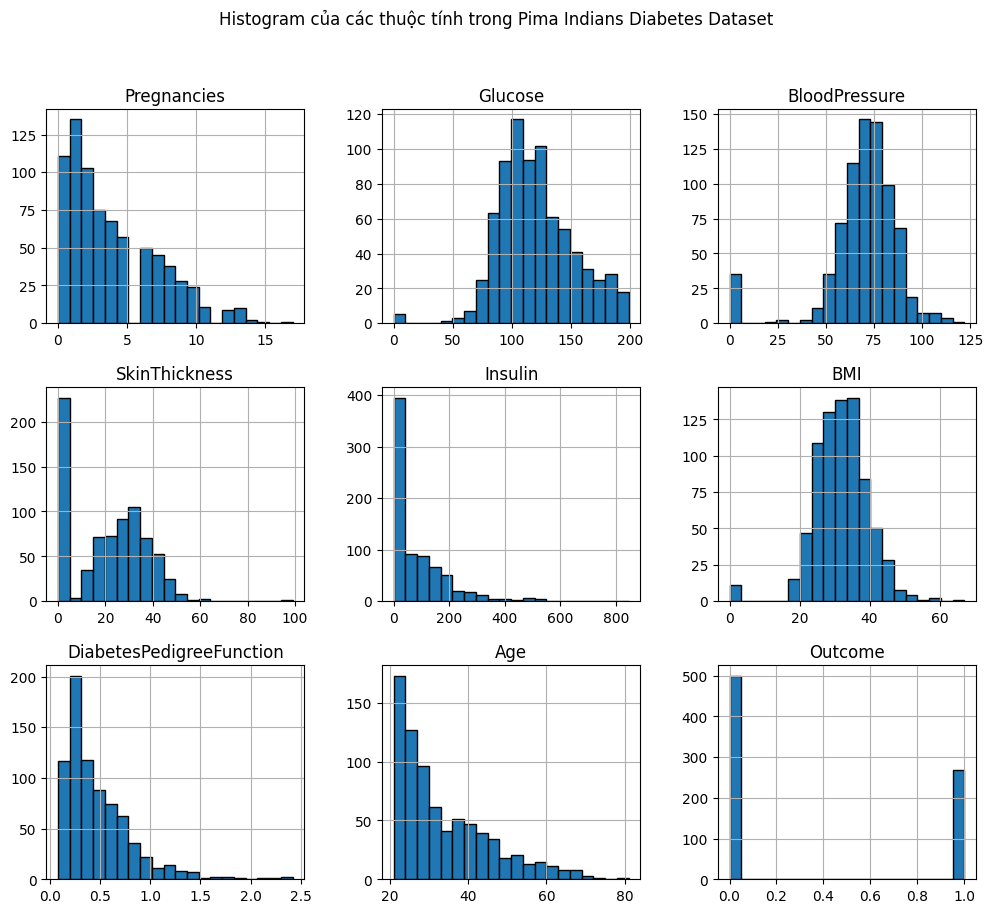

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ histogram cho từng cột
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram của các thuộc tính trong Pima Indians Diabetes Dataset")
plt.show()


Vẽ heatmap để xem độ tương quan

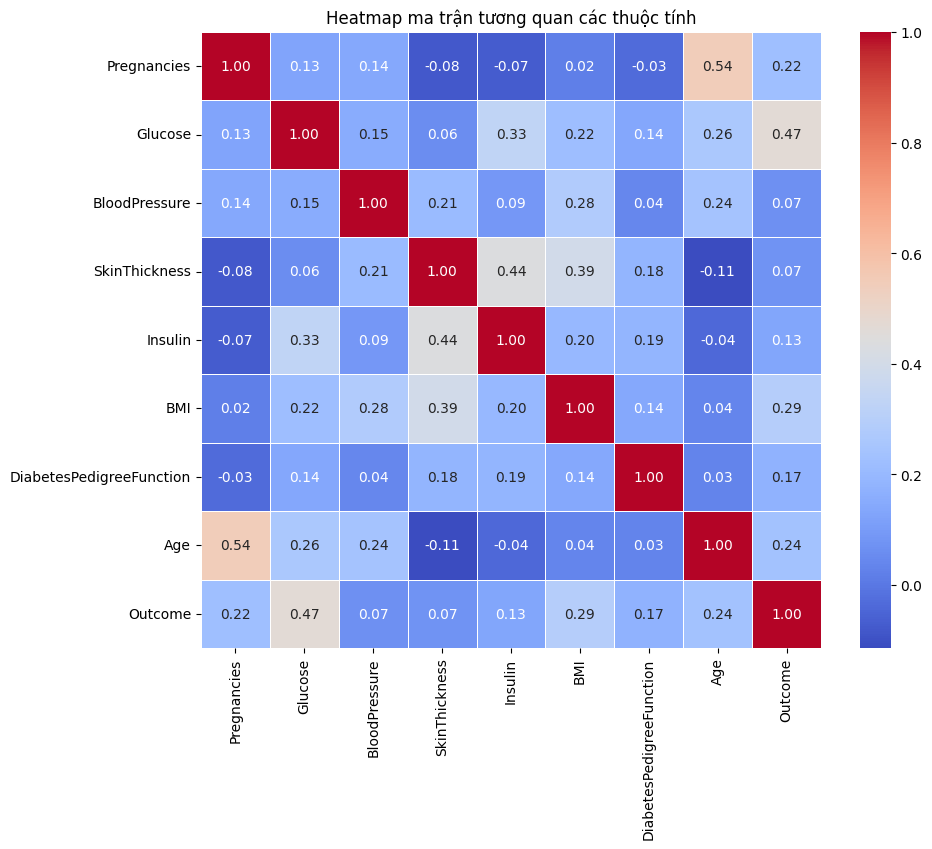

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr()  # ma trận tương quan
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap ma trận tương quan các thuộc tính")
plt.show()


Kiểm tra ngoại lệ

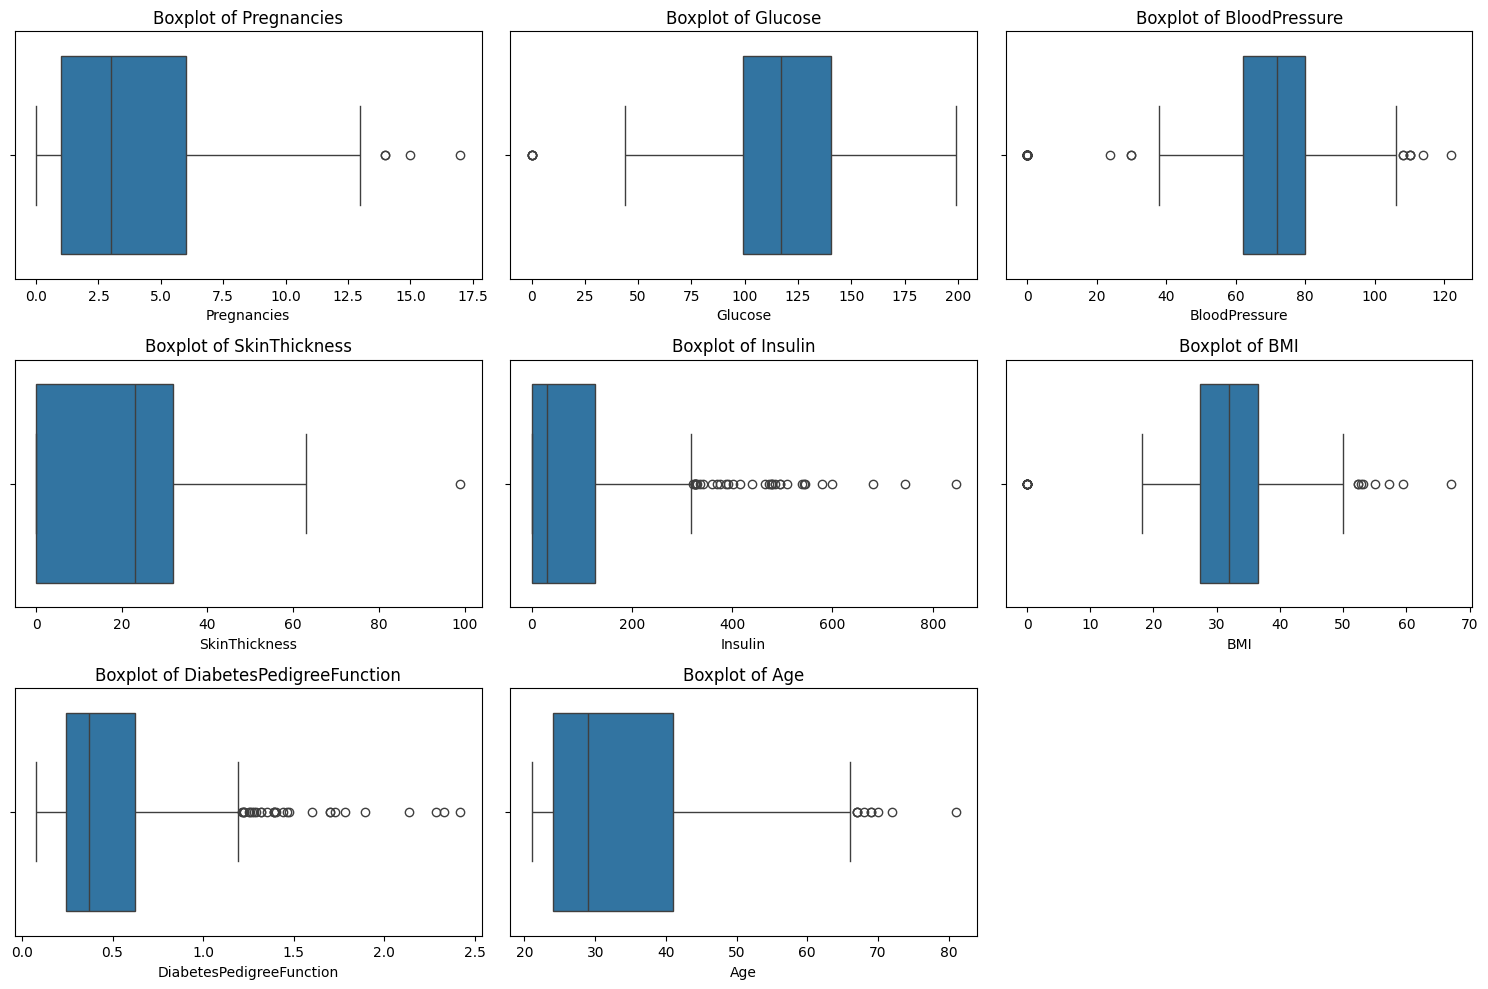

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # bỏ Outcome
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
